In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles

In [2]:
print("hello")

hello


# The `Particles` class

We could write a `Particles` python class to handle the particle information.
The class contains several physical properties, including tag, mass, position, velocity, acceleration, and time.

For our own convenience, we want to have the below data type to handle the N-body simulation:

In [3]:
time          = 0    # the starting  time
num_particles = 100  # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)

In [4]:
print(masses.shape)

(100, 1)


Note that, the mass is setting to a Nx1 martrix.\
The reason to use Nx1 matrix but not a 1D numpy array is because mass x velcoity is the momentum\
and only Nx1 matrix could multiple with an Nx3 matrix.

The particles class can be initialized by

In [5]:
particles = Particles(N=num_particles)

In [6]:
particles.masses = np.ones((num_particles,1))
particles.positions = np.random.rand(num_particles, 3)
particles.velocities = np.random.rand(num_particles, 3)
particles.accelerations = np.random.rand(num_particles, 3)
particles.tags = np.linspace(1,num_particles,num_particles)

Make sure your code will check the shape of your inputs. It must return errors when setting an incorrect shape.

In [7]:
# make sure the below codes will return an error. uncomment each line to test

#particles.masses = np.ones(num_particles)
#particles.positions = np.random.rand(199, 3)
#particles.velocities = np.random.rand(500, 3)
#particles.accelerations = np.random.rand(num_particles, 2)
#particles.tags = np.linspace(1,num_particles,500)

# (Optional) Add (remove) more particles

We could add more particles on the fly.

In [11]:
num_particles = 20
masses = np.ones((num_particles,1))
positions = np.random.rand(num_particles, 3)
velocities = np.random.rand(num_particles, 3)
accelerations = np.random.rand(num_particles, 3)
print(positions)
#particles.add_particles(masses, positions, velocities, accelerations)
#print(particles.nparticles)

[[0.58796762 0.74177384 0.68689986]
 [0.82581224 0.28780776 0.23290215]
 [0.7564944  0.11795701 0.64401158]
 [0.52390418 0.70371763 0.28205441]
 [0.15431267 0.7299732  0.96102177]
 [0.60257748 0.69187341 0.60500529]
 [0.37026514 0.39301174 0.80165802]
 [0.75655649 0.5442098  0.9456389 ]
 [0.21850773 0.79580242 0.95687869]
 [0.58013306 0.11878549 0.6362276 ]
 [0.32199156 0.68898347 0.38064788]
 [0.26057778 0.1727637  0.46433805]
 [0.92238423 0.64007659 0.04362896]
 [0.89460635 0.91573659 0.60809402]
 [0.32890618 0.6314707  0.28771664]
 [0.89193763 0.87366264 0.15181427]
 [0.13465482 0.96640563 0.13353829]
 [0.34741063 0.3277574  0.80777472]
 [0.92357523 0.52425467 0.97437597]
 [0.09506161 0.38248091 0.10111307]]


### Data IO

We could also dump the particle information into a text file.

In [ ]:
particles.output(filename='data.txt')

### Visualization

We could also visualize (both 2D and 3D) these particles

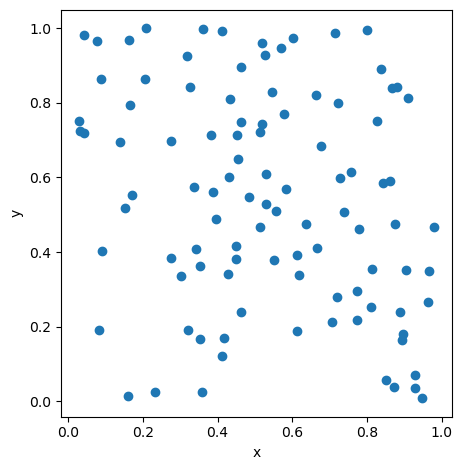

In [8]:
particles.draw(dim=2)

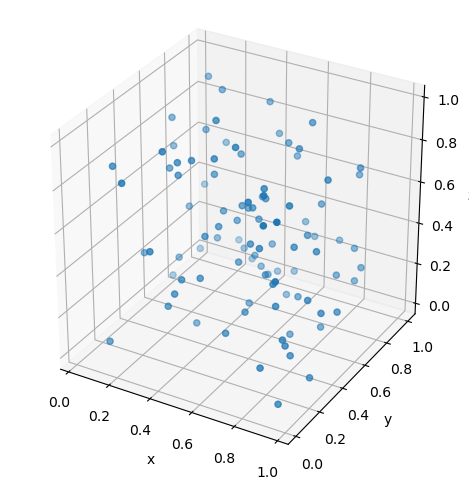

In [9]:
particles.draw(dim=3)

# Exercise 1

Implment the `Particles` class in `./nbody/particles.py`. Please make sure your Particles class has passed all the test in the above section. 

In [ ]:
# TODO: test your class here







# Exercise 2

Once you have the `Particles` class implmented correctly.\
You should be able to use it to initialzie arbitry distribution of N particles.

(1) Initialize two particles that describe the Sun-Earth binary system.

(2) Initialize a 3D particle clould with N=1000 particles in a normal distrbuiotn (sigma=1) and total mass equal to 10.

Hints: use `numpy.random.randn` (see https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

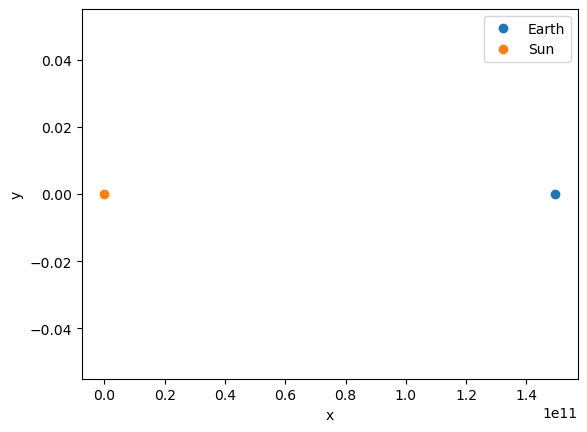

In [5]:
# TODO:
sun_mass = 1.989e30 # kg
earth_mass = 5.972e24 # kg
separation = 1.496e11 # m
period = 3.154e7 # s
r_sun = separation * earth_mass / (sun_mass + earth_mass)
r_earth = separation * sun_mass / (sun_mass + earth_mass)
vy_sun = 2 * np.pi * r_sun / period
vy_earth = 2 * np.pi * r_earth / period

pts = Particles(N=2)
pts.masses = np.array([[sun_mass], [earth_mass]])
pts.positions = np.array([[-r_sun, 0, 0], [r_earth, 0, 0]])
pts.velocities = np.array([[0, -vy_sun, 0], [0, vy_earth, 0]])
pts.accelerations = np.zeros((2, 3))
pts.tags = np.array([1, 2])

# visualize the system
plt.figure()
plt.plot(pts.positions[1, 0], pts.positions[1, 1], 'o', label='Earth')
plt.plot(pts.positions[0, 0], pts.positions[0, 1], 'o', label='Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





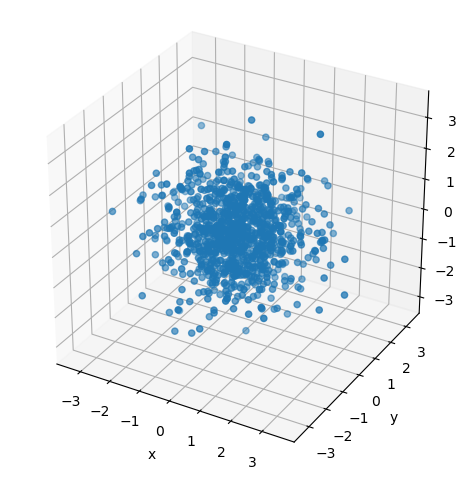

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

In [6]:
num_particles = 1000
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

# visualize the system
pts.draw(dim=3)
